# **Step-1:** Importing Required Libraries

In [1]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob 
import cv2 
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.mobilenet import MobileNet
from sklearn.ensemble import VotingClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step-2:** Performing Preprocessing

In [4]:
import sklearn
from sklearn.model_selection import train_test_split

#Capture training data and labels into respective lists
images = []
labels = []



for directory_path in glob.glob("/content/drive/MyDrive/NIT Durgapur Internship 3/Dataset_Modified/*"):
   data_split=os.path.split(directory_path)
   label=data_split[-1]
   print(label)
   for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img=np.asarray(img)
        img=(img/126.5)
        images.append(img)
        labels.append(label)
        
        
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, train_size = 0.7, random_state=1, shuffle = True)



Hand
BreastMRI
ChestCT
CXR
AbdomenCT
HeadCT


In [1]:
#Convert lists to arrays                
test_images = np.array(X_test)
test_labels = np.array(Y_test)


NameError: ignored

In [ ]:
train_images = np.array(X_train)
train_labels = np.array(Y_train)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [ ]:
y_train[10:20]

In [ ]:
x_train.shape

In [ ]:
 # Normalize pixel values to between 0 and 1

In [ ]:
labels=np.unique(y_test)
labels

In [ ]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# **Step-3:** Feature Extraction using VGG16

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128, 3))

In [ ]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

In [ ]:
#Now, let us use features from convolutional network for RF
feature_extractor_vgg16=VGG_model.predict(x_train)

In [ ]:
fe_vgg16_test=VGG_model.predict(x_test)
#fe_vgg16_test=MobileNet_model.predict(x_test)

In [ ]:
features_vgg16 = feature_extractor_vgg16.reshape(feature_extractor_vgg16.shape[0], -1)

In [ ]:
f_vgg16_test= fe_vgg16_test.reshape(fe_vgg16_test.shape[0],-1)

In [ ]:
print(f_vgg16_test.shape)

# **Step-4:** Classifications using Machine Learning Models

## **Step-4.1:** Classification using K-Nearest Neighbours

In [ ]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features_vgg16 , y_train)
y_pred=knn.predict(f_vgg16_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score



In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred,average='weighted'))
print("Recall =",recall_score(y_test,y_pred,average='weighted'))
print("F_1 =", f1_score(y_test, y_pred, average='weighted'))

Accuracy =  0.998766345916605
Precision = 0.9987682136041569
Recall = 0.998766345916605
F_1 = 0.998765670716078


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1337,    0,    0,    1,    0,    0],
       [   0, 1370,    0,    0,    0,    0],
       [   0,    1, 1319,    0,    4,    2],
       [   0,    0,    0, 1347,    0,    0],
       [   0,    0,    0,    0, 1394,    0],
       [   1,    0,    0,    1,    0, 1329]])

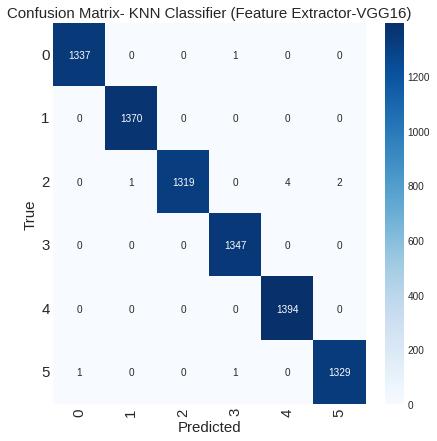

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- KNN Classifier (Feature Extractor-VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_KNN.png')
plt.show()

## **Step-4.2:** Classification using Logistic Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
features_vgg16.shape

(18914, 8192)

In [ ]:
# define the multinomial logistic regression model
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrm.fit(features_vgg16 , y_train)
y_pred_lr=lrm.predict(f_vgg16_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score



In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test,y_pred_lr))
print("Precision =", precision_score(y_test,y_pred_lr,average='weighted'))
print("Recall =",recall_score(y_test,y_pred_lr,average='weighted'))
print("F_1 =", f1_score(y_test,y_pred_lr, average='weighted'))

Accuracy =  1.0
Precision = 1.0
Recall = 1.0
F_1 = 1.0


In [ ]:
cm = confusion_matrix(y_test,y_pred_lr)
cm

array([[1338,    0,    0,    0,    0,    0],
       [   0, 1370,    0,    0,    0,    0],
       [   0,    0, 1326,    0,    0,    0],
       [   0,    0,    0, 1347,    0,    0],
       [   0,    0,    0,    0, 1394,    0],
       [   0,    0,    0,    0,    0, 1331]])

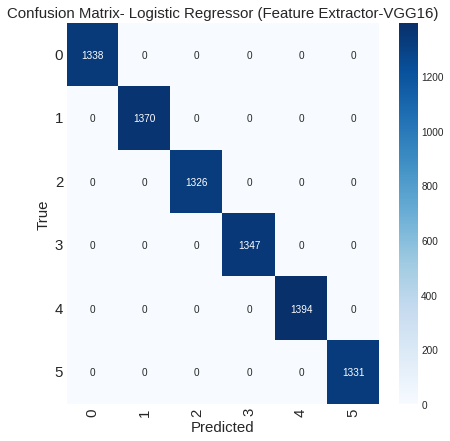

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Logistic Regressor (Feature Extractor-VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_LR.png')
plt.show()

## **Step-4.3:** Classification using Random Forest

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
# Train the model on training data
RF_model.fit(features_vgg16, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
print(RF_model.score(features_vgg16, y_train))

1.0


In [ ]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(f_vgg16_test)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
print(prediction_RF.shape)

(8106,)


In [ ]:
print(test_labels.shape)

(8106,)


In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))
print("Precision =", precision_score(test_labels,prediction_RF,average='weighted'))
print("Recall =",recall_score(test_labels,prediction_RF,average='weighted'))
print("F_1 =", f1_score(test_labels,prediction_RF,average='weighted'))

Accuracy =  0.999753269183321
Precision = 0.9997536226658664
Recall = 0.999753269183321
F_1 = 0.999753264511337


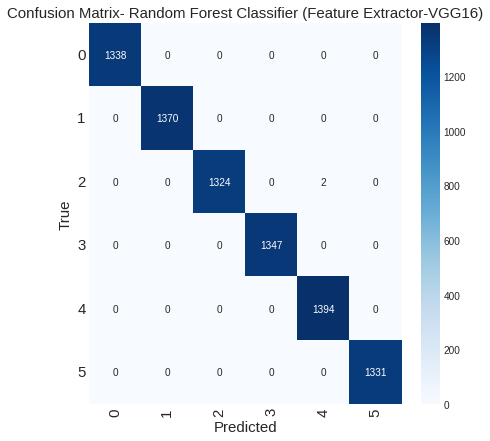

In [ ]:
cm = confusion_matrix(test_labels,prediction_RF)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Random Forest Classifier (Feature Extractor-VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_RandomForest.png')
plt.show()

## **Step-4.4:** Classification using XGBoost




In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
#xgb_classifier = xgb.XGBClassifier(tree_method = "gpu_hist")

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(features_vgg16, y_train)

KeyboardInterrupt: ignored

In [ ]:
predictions = xgb_classifier.predict(f_vgg16_test)
prediction_XG = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model:",metrics.accuracy_score(test_labels, prediction_XG))

Accuracy of Model:: 0.9996299037749815


In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_XG))
print("Precision =", precision_score(test_labels, prediction_XG,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_XG,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_XG,average='wighted'))

Accuracy =  0.9996299037749815
Precision = 0.9996299037749815
Recall = 0.9996299037749815
F_1 = 0.9996299037749815


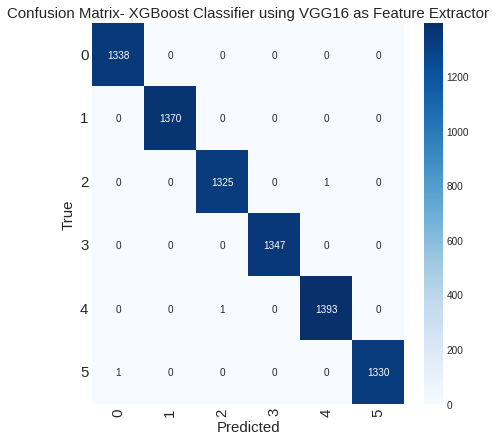

In [ ]:
### Confusion Matrix
cm = confusion_matrix(test_labels, prediction_XG)
import seaborn as sns
import matplotlib.pyplot as plt


class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- XGBoost Classifier(Feature Extractor-VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_XGBoost.png')
plt.show()

## **Step-4.5:** Classification using LightGBM


In [ ]:
import lightgbm as lgb

In [ ]:
lightgbm_classifier =lgb.LGBMClassifier()

In [ ]:
lightgbm_classifier.fit(features_vgg16, y_train)

LGBMClassifier()

In [ ]:
predictions = lightgbm_classifier.predict(f_vgg16_test)
prediction_lightgbm = le.inverse_transform(predictions)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_lightgbm))
print("Precision =", precision_score(test_labels, prediction_lightgbm,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_lightgbm,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_lightgbm,average='weighted'))

Accuracy =  0.9996299037749815
Precision = 0.9996301743235221
Recall = 0.9996299037749815
F_1 = 0.9996299020840418


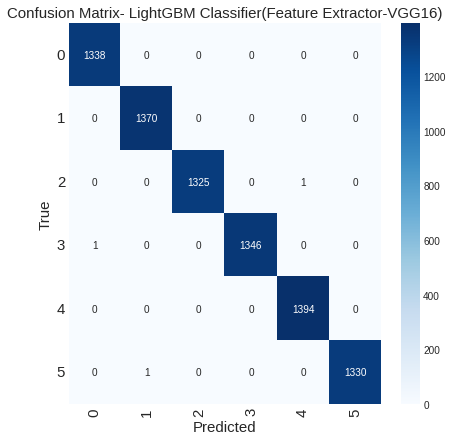

In [ ]:
cm = confusion_matrix(test_labels, prediction_lightgbm)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- LightGBM Classifier(Feature Extractor-VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_LightGBM.png')
plt.show()

## **Step-4.6:** Classification using SVC- Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=0.65, random_state=0, kernel='rbf')

In [ ]:
svc.fit(features_vgg16, y_train)

SVC(C=0.65, random_state=0)

In [ ]:
predictions = svc.predict(f_vgg16_test)
prediction_SVC = le.inverse_transform(predictions)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_SVC))
print("Precision =", precision_score(test_labels, prediction_SVC,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_SVC,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_SVC,average='weighted'))

Accuracy =  1.0
Precision = 1.0
Recall = 1.0
F_1 = 1.0


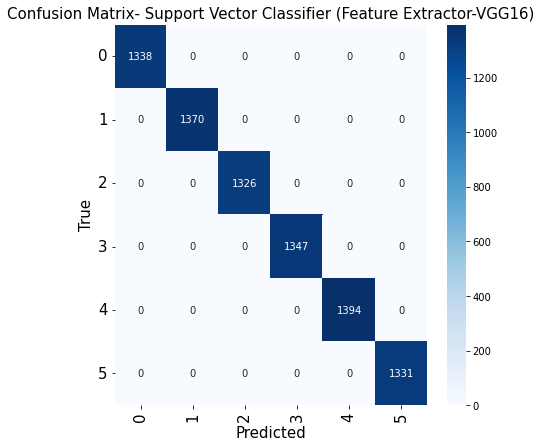

In [ ]:
cm = confusion_matrix(test_labels, prediction_SVC)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Support Vector Classifier (Feature Extractor-VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_SVC.png')
plt.show()

## **Step-5:** TSNE (t-Distributed Stochastic Neighbour Embedding)



In [ ]:
import numpy as np
from sklearn.manifold import TSNE
#>>> X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(features_vgg16)
X_embedded.shape

(18914, 3)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

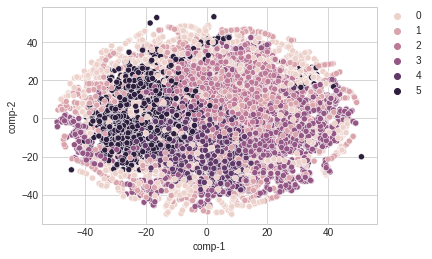

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="") 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/TSNE_Train_data_with_VGG16.png')
plt.show()

## **Step-6:** Classification using Ensemble Model

### Ensemble Model-1


In [ ]:
final_model = VotingClassifier(estimators=[('rf', RF_model), ('xgb', xgb_classifier),('knn',knn),('svc',svc),('lr',lrm)], voting='weighted')
 

In [ ]:
final_model.fit(features_vgg16, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgb', XGBClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svc', SVC(C=0.65, random_state=0)),
                             ('lr',
                              LogisticRegression(multi_class='multinomial'))])

In [ ]:
predictions = final_model.predict(f_vgg16_test) # X_test_features
prediction_final = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_final,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_final,average='weighted'))

Accuracy of Model:: 1.0
Precision = 1.0
Recall = 1.0
F_1 = 1.0


In [ ]:
print("Accuracy =",accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average=None))
print("Recall =",recall_score(test_labels, prediction_final,average=None))
print("F_1 =", f1_score(test_labels, prediction_final,average=None))

Accuracy = 1.0
Precision = [1. 1. 1. 1. 1. 1.]
Recall = [1. 1. 1. 1. 1. 1.]
F_1 = [1. 1. 1. 1. 1. 1.]


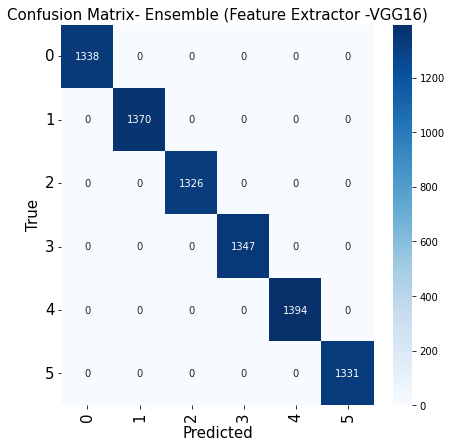

In [ ]:
### Confusion Matrix
cm = confusion_matrix(test_labels, prediction_final)
import seaborn as sns
import matplotlib.pyplot as plt

class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Ensemble (Feature Extractor -VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_Ensemble.png')
plt.show()

### Ensemble Model-2

In [ ]:
final_model_2 = VotingClassifier(estimators=[('rf', RF_model), ('lgbm', lightgbm_classifier),('knn',knn),('svc',svc),('lr',lrm)], voting='hard')
 

In [ ]:
final_model_2.fit(features_vgg16, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('lgbm', LGBMClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=10)),
                             ('svc', SVC(C=0.65, random_state=0)),
                             ('lr',
                              LogisticRegression(multi_class='multinomial'))])

In [ ]:
predictions = final_model_2.predict(f_vgg16_test) # X_test_features
prediction_final = le.inverse_transform(predictions)

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average='weighted'))
print("Recall =",recall_score(test_labels, prediction_final,average='weighted'))
print("F_1 =", f1_score(test_labels, prediction_final,average='weighted'))

Accuracy of Model:: 1.0
Precision = 1.0
Recall = 1.0
F_1 = 1.0


In [ ]:
print("Accuracy =",accuracy_score(test_labels, prediction_final))
print("Precision =", precision_score(test_labels, prediction_final,average=None))
print("Recall =",recall_score(test_labels, prediction_final,average=None))
print("F_1 =", f1_score(test_labels, prediction_final,average=None))

Accuracy = 1.0
Precision = [1. 1. 1. 1. 1. 1.]
Recall = [1. 1. 1. 1. 1. 1.]
F_1 = [1. 1. 1. 1. 1. 1.]


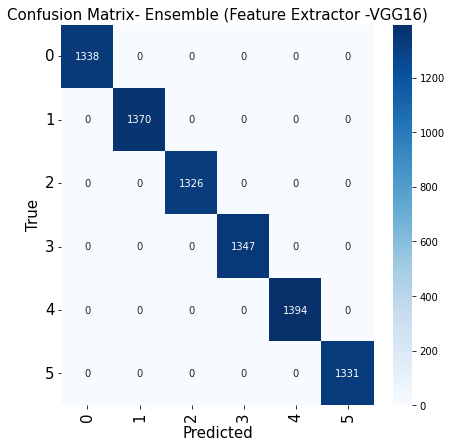

In [ ]:
cm = confusion_matrix(test_labels, prediction_final)
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
class_names = labels

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(7, 7))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt = "g"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 15)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=15)
ax.yaxis.set_ticklabels(class_names, fontsize = 15)
plt.yticks(rotation=0)

plt.title('Confusion Matrix- Ensemble (Feature Extractor -VGG16)', fontsize=15)

plt.savefig('/content/drive/MyDrive/NIT Durgapur Internship 3/Output/VGG16_Ensemble_2.png')
plt.show()